# Biodiversity

### The data will be analyzed and meanigful information will be extracted from it

#### Scoping:
* 1) Which category of animals requires urgent support?
* 2) Which five animal have the highest threat level?
* 3) Which park has the most "Endangered" animals?
* 4) Should the "Endangered" animals be more evenly distributed between parks?

## First: We need to import all the needed libraries and all the of the data files: 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
observations = pd.read_csv("observations.csv")
species_info = pd.read_csv("species_info.csv")

## Second: Let's explore the data

In [4]:
observations.head(10)

,scientific_name,park_name,observations
0,Vicia benghalensis,Great Smoky Mountains National Park,68
1,Neovison vison,Great Smoky Mountains National Park,77
2,Prunus subcordata,Yosemite National Park,138
3,Abutilon theophrasti,Bryce National Park,84
4,Githopsis specularioides,Great Smoky Mountains National Park,85
5,Elymus virginicus var. virginicus,Yosemite National Park,112
6,Spizella pusilla,Yellowstone National Park,228
7,Elymus multisetus,Great Smoky Mountains National Park,39
8,Lysimachia quadrifolia,Yosemite National Park,168
9,Diphyscium cumberlandianum,Yellowstone National Park,250


In [5]:
species_info.head(10)

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN
5,Mammal,Odocoileus virginianus,White-Tailed Deer,NaN
6,Mammal,Sus scrofa,"Feral Hog, Wild Pig",NaN
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered


### First Question: Which category of animals requires urgent support?

##### Since both Data Frames share the "scientific_name" column, we can combine them into one full Data Frame: 

In [6]:
full_df = pd.merge(observations, species_info)
full_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


##### We now can visualize the number of animals in each "category" based on the "conservation_status":

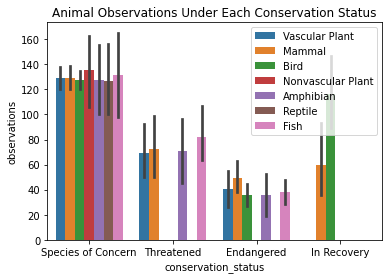

In [24]:
sns.barplot(data = full_df, x = "conservation_status", y = "observations", hue = "category")
plt.title("Animal Observations Under Each Conservation Status")
plt.legend(loc='upper right')
plt.show()

* It can be seen that as the threat level increases in the "conservation_status", the number of observation drops.


##### It might be useful to know the percentage of animals under each "conservation_status" instead of just knowing the number of observations.

In [25]:
cat_obs = full_df[
    ["category", "observations"]
    ].groupby(
    "category"
    ).observations.sum().reset_index()

In [26]:
def conservation_status_info(conservation_status, df, n): # takes a DataFrame and a "conservations_status" and returns a new DataFrame containing the observations for each "category" under the specified "conservation_status"
    sub_df = df[df.conservation_status == conservation_status]
    
    categories = list(df.category.unique())
    occurunces = []
    
    for category in categories:

        occurunces.append(
            sub_df[sub_df.category == category].observations.sum()

        )

    new_df = pd.DataFrame(
            {
                "category": categories,
                "conservation_status": conservation_status,
                "occurunces": occurunces,
            },
            index = list(range(n*7, n*7 + 7))
    )
    return new_df


stat_lst = list(full_df.conservation_status.dropna().unique())
frames = []
for i in range(len(stat_lst)):
    df = conservation_status_info(stat_lst[i], full_df, i)
    frames.append(df)
    
cat_cons = pd.concat(frames)  
cat_cons = cat_cons.sort_values(
    by = "category"
    ).reset_index(
    drop = True
)

In [10]:
cat_obs_cons = pd.merge(cat_obs, cat_cons)
cat_obs_cons["percentage"] = cat_obs_cons.apply(
    lambda x : 
    100 * x["occurunces"] / x["observations"], 
    axis = 1
)
cat_obs_cons.head(10)

,category,observations,conservation_status,occurunces,percentage
0,Amphibian,45068,In Recovery,0,0.000000
1,Amphibian,45068,Species of Concern,2044,4.535369
2,Amphibian,45068,Endangered,144,0.319517
3,Amphibian,45068,Threatened,564,1.251442
4,Bird,332371,Species of Concern,40758,12.262803
5,Bird,332371,In Recovery,1392,0.418809
6,Bird,332371,Endangered,574,0.172699
7,Bird,332371,Threatened,0,0.000000
8,Fish,72901,Threatened,1645,2.256485
9,Fish,72901,Endangered,455,0.624134


##### The above Data Frame has the percentage of animals that are under each conservation-status for each category

##### We can now use this Data Frame to visualize the percentage of "Endangered" animals under each "category":

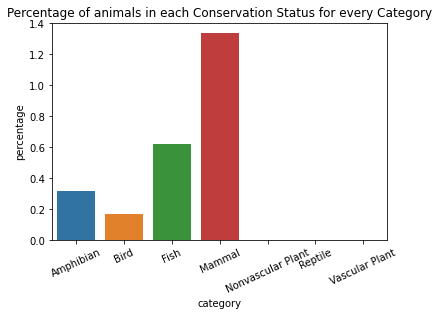

<Figure size 432x288 with 0 Axes>

In [11]:
sns.barplot(data = cat_obs_cons[cat_obs_cons.conservation_status == "Endangered"], x = "category", y = "percentage")
plt.xticks(rotation=25)
plt.title("Percentage of animals in each Conservation Status for every Category")
plt.show()
plt.clf()


* It is clear that Mammals have the highest percentage of animals under "Endangered", which suggests the need of more support towards them.
* Fish, also, are in need of urgent help, since they too have a relativly high percentage of "Endengared" occurunces. And from the first Figure, there are no observations of fish under "In Recovery".

### Second Question: Which five animals have the highest threat level?

In [27]:
endangered_df = full_df[full_df.conservation_status == "Endangered"].reset_index()

In [13]:
name_obs_end = endangered_df[
    ["scientific_name", "observations", "category"]
    ].groupby(
    ["scientific_name", "category"]
    ).observations.sum(
    ).reset_index(
    ).sort_values(
    by = "observations"
    ).reset_index(
    drop = True
    )
name_obs_end.head(10)

,scientific_name,category,observations
0,Grus americana,Bird,131
1,Canis rufus,Mammal,137
2,Vermivora bachmanii,Bird,141
3,Noturus baileyi,Fish,143
4,Rana sierrae,Amphibian,144
5,Myotis sodalis,Mammal,145
6,Chasmistes liorus,Fish,146
7,Picoides borealis,Bird,146
8,Glaucomys sabrinus coloratus,Mammal,153
9,Ovis canadensis sierrae,Mammal,153


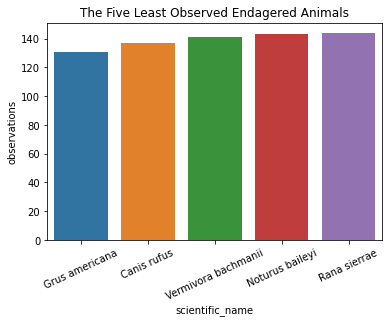

<Figure size 432x288 with 0 Axes>

In [14]:
sns.barplot(data = name_obs_end.iloc[0:5], x = "scientific_name", y = "observations")
plt.xticks(rotation=25)
plt.title("The Five Least Observed Endagered Animals")
plt.show()
plt.clf()

* The five animals that need the most help are: Grus americana, Canis rufus, Vermivora bachmanii, Noturus baileyi, and Rana sierrae

### Question Three: Which park has the most "Endangered" animals?

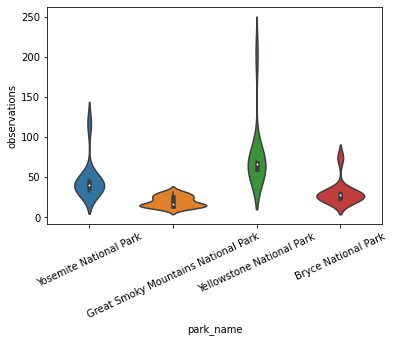

In [48]:
sns.violinplot(data = endangered_df, x = "park_name", y = "observations")
plt.xticks(rotation=25)
plt.show()

In [37]:
new_df = endangered_df[["park_name", "observations"]].groupby("park_name").observations.sum().reset_index()
new_df.head(15)

,park_name,observations
0,Bryce National Park,619
1,Great Smoky Mountains National Park,393
2,Yellowstone National Park,1558
3,Yosemite National Park,943


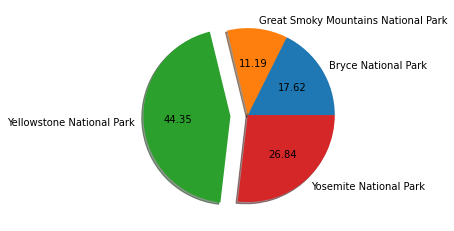

In [47]:
myexplode = [0, 0, 0.2, 0]

plt.pie(new_df.observations, labels = list(new_df.park_name), explode = myexplode, shadow = True, autopct='%.2f')
plt.show()

* Yellostone National Park has the highest number of endangered animals.

### Question Four: Should the "Endangered" animals be more evenly distributed between parks?

* Since Yellostone National Park has almost half of the endangered animals between all four parks, the endangered animals should be distributed between them more evenly.